In [9]:
#important library we need
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#### load the data:

In [10]:
bank = pd.read_csv("../data/bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### this shows us the column name and number of non null values in the columns and the type of each column:

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [12]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
bank.duplicated().sum()

0

In [14]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


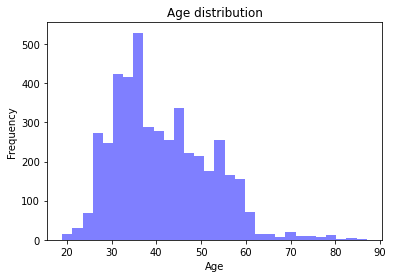

In [15]:
#Create a histogram
plt.hist(bank.age, bins = 30, color= "blue", alpha = 0.5)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### at the above figure we can show the range of the ages in the bank info are between the 20 to 60

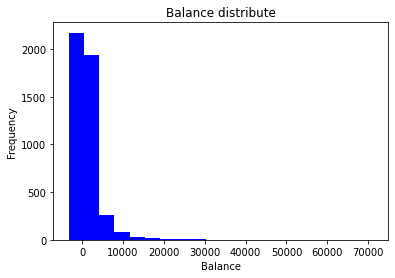

In [17]:
# Create a histogram
plt.hist(bank.balance, bins=20, color="blue")
plt.title('Balance distribute')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

### we can see the all average balanced years not exceed 20000 a most of it are equal 0

Text(0, 0.5, 'Frequency')

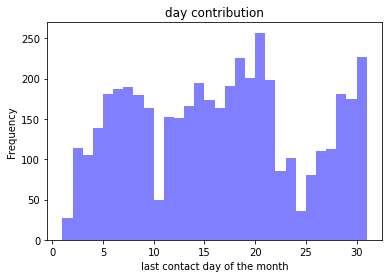

In [24]:
#Create a histogram
plt.hist(bank.day, bins = 30, color="blue", alpha = 0.5)
plt.title('day contribution')
plt.xlabel('last contact day of the month')
plt.ylabel('Frequency')

* Hầu hết mọi người thường liên lạc nhiều hơn ở đầu tháng và ít hơn ở cuối tháng có thể là do đầu tháng công việc nhiều bận rộn nhiều nên việc gọi điện trao đổi với nhau sẽ rất nhiều trong việc học tập hay công việc
* Có một số người liên lạc nhiều vào cuối tháng có thể là do các hoạt động xã hội vào cuối tháng


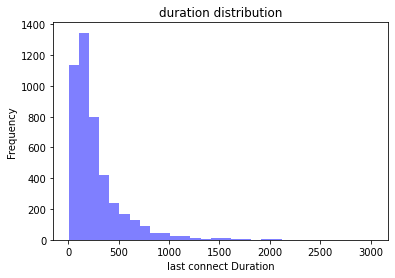

In [25]:
plt.hist(bank.duration, bins=30, color="blue", alpha = 0.5)
plt.title('duration distribution')
plt.xlabel('last connect Duration')
plt.ylabel('Frequency')
plt.show()


* Hầu hết các kết nối đến ngân hàng thường thì với thời gian ngắn do người dùng chủ yếu thực hiện với các giao dịch đơn giản như là kiểm tra tài khoản hay chuyển khoản đơn giản không quá phức tạp
* Một số các kết nối có thời gian dài thường thì do người dùng làm các thủ tục phức tạp như mở tài khoản hay thực hiện vay 
* Một số kết nôi có thời gian rất ngắn có thể là do lỗi ngân hàng 

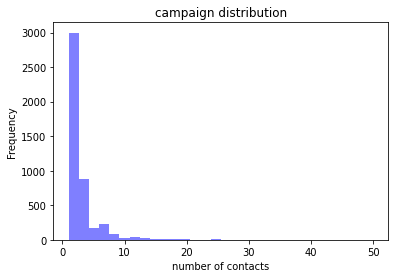

In [26]:
#Create a histogram
plt.hist(bank.campaign, bins = 30, color="blue", alpha = 0.5)
plt.title("campaign distribution")
plt.xlabel("number of contacts")
plt.ylabel("Frequency")
plt.show()

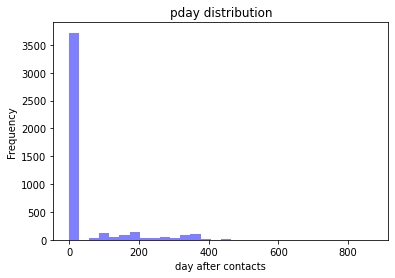

In [27]:
plt.hist(bank.pdays, bins = 30, color="blue", alpha=0.5)
plt.title("pday distribution")
plt.xlabel("day after contacts")
plt.ylabel("Frequency")
plt.show()

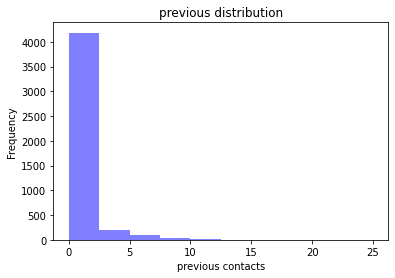

In [28]:
# Create a histogram
plt.hist(bank.previous, bins=10, color='blue', alpha=0.5)
plt.xlabel('previous contacts')
plt.ylabel('Frequency')
plt.title('previous distribution')
plt.show()

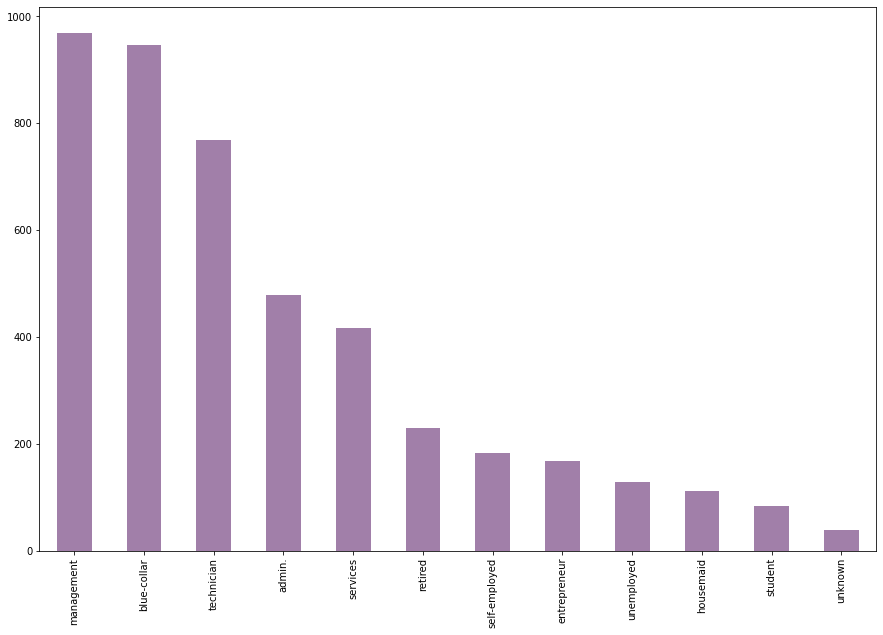

In [37]:
ax = plt.subplots(figsize = (15, 10))
ax = bank['job'].value_counts().plot(kind = 'bar',colormap = 'viridis', alpha=0.5)

* Ngành quản lý có thu nhập cao và thường xuyên phải dùng ngân hàng để thanh toán các  khoản chi phí khác nhau để hoàn thành một dự án do đó management sẽ cao
* Người lao động sử dụng bank ngày càng cao bởi vì hiện nay ngành lao động cũng kiếm được nhiều tiền đặc biệt là công ty thường trả lương bằng ngân hàng do đó người lao động phải có tài khoản ngân hàng
* Số lượng người dùng "Đã nghỉ hưu", "Thất nghiệp", "Người giúp việc", "Sinh viên" và "Chưa xác định" thấp vì có thu nhập không ổn định nên việc dùng tài khoản ngân hàng tương đối ít


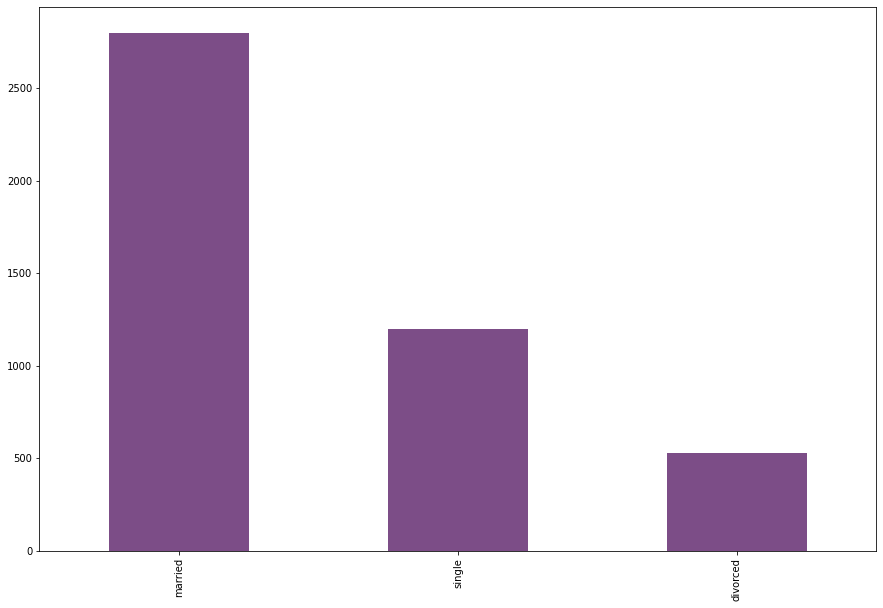

In [40]:
ax = plt.subplots(figsize = (15, 10))
ax = bank['marital'].value_counts().plot(kind = 'bar',colormap = 'viridis', alpha=0.7)

* Nhóm đã kết hôn thường thì thu nhập có vẻ ổn định hơn, đặc biệt là sử dụng ngân hàng nhiều trong việc vay mua bảo hiểm nhà, vay tiền mua nhà đất và đặc biệt là bảo hiểm nhân thọ
* Nhóm độc thân thường là những bạn sinh  viên mới ra trường hoặc là các bạn trung niên vẫn còn có thu nhập thấp chưa tự chủ được tài chính chỉ làm việc liên quan đến tài khoản tiết kiệm và thẻ tín dụng là chủ yếu
* Nhóm đã ly hôn thì thường lúc này họ vẫn còn đang khủng hoảng về tài chính, nên việc sử dụng ngan hàng cũng chủ yếu là tư vấn tài chính hay tái cấp vốn nhà

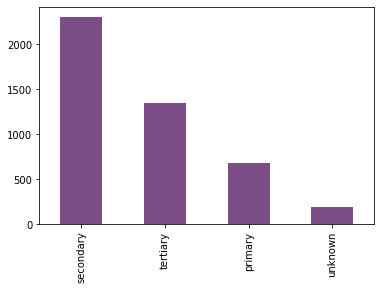

In [41]:
ax = bank['education'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

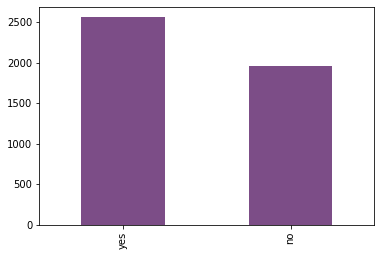

In [42]:
ax = bank['housing'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

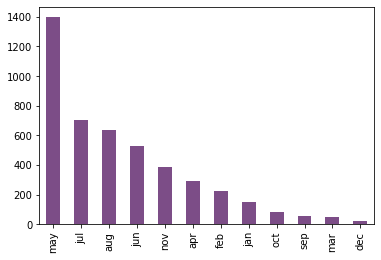

In [43]:
ax = bank['month'].value_counts().plot(kind='bar', colormap='viridis', alpha=0.7)

* Số lượng người gửi tiền ngân hàng có sự thay đổi theo mùa vụ.
* Tháng 5 là tháng có số lượng người gửi tiền cao nhất, có thể do nhu cầu chi tiêu cho các ngày lễ lớn như 30/4 và 1/5.
* Tháng 10 là tháng có số lượng người gửi tiền thấp nhất, có thể do nhu cầu chi tiêu thấp sau khi đã chi tiêu nhiều cho các ngày lễ trong tháng 9.

### from the above figures i will drop the useless columns for the prediction

In [45]:
#drop th useless columns :
bank.drop(columns=['poutcome','previous','pdays','default'],inplace=True)
bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,y
0,30,unemployed,married,primary,1787,no,no,cellular,19,oct,79,1,no
1,33,services,married,secondary,4789,yes,yes,cellular,11,may,220,1,no
2,35,management,single,tertiary,1350,yes,no,cellular,16,apr,185,1,no
3,30,management,married,tertiary,1476,yes,yes,unknown,3,jun,199,4,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,5,may,226,1,no


In [46]:
bank = pd.get_dummies(bank, columns=['housing','loan','job','marital','contact','month','education'])

In [47]:
targe=bank['y']
targe.replace({'yes':1,'no':0},inplace=True)
bank.drop('y',axis=1,inplace=True)

In [48]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   day                  4521 non-null   int64
 3   duration             4521 non-null   int64
 4   campaign             4521 non-null   int64
 5   housing_no           4521 non-null   uint8
 6   housing_yes          4521 non-null   uint8
 7   loan_no              4521 non-null   uint8
 8   loan_yes             4521 non-null   uint8
 9   job_admin.           4521 non-null   uint8
 10  job_blue-collar      4521 non-null   uint8
 11  job_entrepreneur     4521 non-null   uint8
 12  job_housemaid        4521 non-null   uint8
 13  job_management       4521 non-null   uint8
 14  job_retired          4521 non-null   uint8
 15  job_self-employed    4521 non-null   uint8
 16  job_services         452

### split the data for the machine learning model:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(bank, targe, test_size=0.3, random_state=42)

In [50]:
# Create the Decision Tree Classifier
dt_classifier =DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, criterion='entropy')
# Train the classifier
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [52]:
# Additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1205
           1       0.51      0.33      0.40       152

    accuracy                           0.89      1357
   macro avg       0.71      0.64      0.67      1357
weighted avg       0.87      0.89      0.88      1357

